In [28]:
from collections import Counter
from collections import defaultdict
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import pandas as pd
from pyclts import CLTS

from eff.data import get_word_list

In [29]:
langs_per_family = pd.read_csv("../northeuralex_vowel_harmony.csv")

lang_ids = list(langs_per_family['ID'])

lang2family = {}
for i, row in langs_per_family.iterrows():
    lang2family[row.ID] = row.Family

color_mapping = {
    "Abkhaz-Adyge": 'grey', "Tungusic": 'burlywood', "Mongolic": 'plum', 'Yukaghir': 'mediumseagreen', "Ainu": 'grey',
    "Dravidian": 'yellowgreen', "Burushaski": 'grey', "Nakh-Daghestanian": 'indianred', "Koreanic": 'grey', 
    "Eskimo-Aleut": 'cyan', "Chukotko-Kamchatkan": 'slateblue', "Yeniseian": 'grey', "Indo-European": 'goldenrod',
    "Sino-Tibetan": 'grey', "Nivkh": 'grey', "Uralic": 'forestgreen', "Turkic": 'darkcyan', "Japonic": 'grey',
    "Basque": 'grey', "Afro-Asiatic": 'olive', "Kartvelian": 'grey'
}
# sort alphabetically
color_mapping = dict(sorted(color_mapping.items(), key=lambda item: item[0]))

singletons = [fam for fam, color in color_mapping.items() if color == 'grey']
singletons_str = "Abkhaz-Adyge, Ainu,\nBasque, Burushaski,\nKartvelian Koreanic, Japonic\nNivkh, Yeniseian, Sino-Tibetan"
legend_elements = []
for fam, color in color_mapping.items():
    if fam not in singletons:
        elem = Patch(facecolor=color, edgecolor='black', label=fam)
        legend_elements.append(elem)
legend_elements.append(Patch(facecolor='grey', edgecolor='black', \
    label=singletons_str))

In [30]:
word_list = get_word_list('northeuralex')
bipa = CLTS().bipa

loading forms for northeuralex: 100%|██████████| 121612/121612 [00:03<00:00, 38846.44it/s]


In [31]:
len_counts = defaultdict(lambda: [])
for language in word_list.languages:
    lang_id = language.id.split("-")[1]
    for form in language.forms:
        n_vowels = sum([1 for s in form.data["Segments"] if bipa[s].type == 'vowel' ])
        len_counts[lang_id].append(n_vowels)

len_dicts = {}
for l, counts in len_counts.items():
    len_dicts[l] = Counter(counts)

fin 602 418
krl 442 736
olo 465 811
vep 466 402
ekk 387 493
liv 629 303
sma 392 748
smj 760 221
sme 612 311
smn 646 338
sms 703 316
sjd 580 168
mrj 608 385
mhr 667 298
mdf 673 301
myv 650 313
udm 432 474
koi 422 368
kpv 496 367
hun 588 250
kca 460 355
mns 362 536
sel 430 526
yrk 569 391
enf 544 336
nio 350 774
ben 485 382
hin 663 473
pbu 476 460
pes 423 532
kmr 489 356
oss 546 425
hye 518 316
ell 501 622
sqi 626 213
bul 606 391
hrv 489 577
slv 449 457
slk 566 293
ces 567 263
pol 536 368
ukr 445 515
bel 567 363
rus 550 314
lit 548 630
lav 473 135
isl 573 281
nor 557 154
swe 572 178
dan 515 164
deu 479 97
nld 433 206
eng 419 142
gle 593 222
cym 448 183
bre 470 193
lat 391 562
fra 573 261
cat 509 393
spa 589 535
por 616 539
ita 384 833
ron 531 438
tur 626 455
azj 570 383
uzn 510 352
kaz 584 567
bak 425 453
tat 621 323
sah 530 285
chv 691 249
khk 688 215
bua 514 724
xal 596 277
evn 435 737
mnc 497 961
gld 438 454
ket 410 159
ykg 361 509
yux 491 323
itl 331 183
ckt 318 749
niv 361 128
ain 3

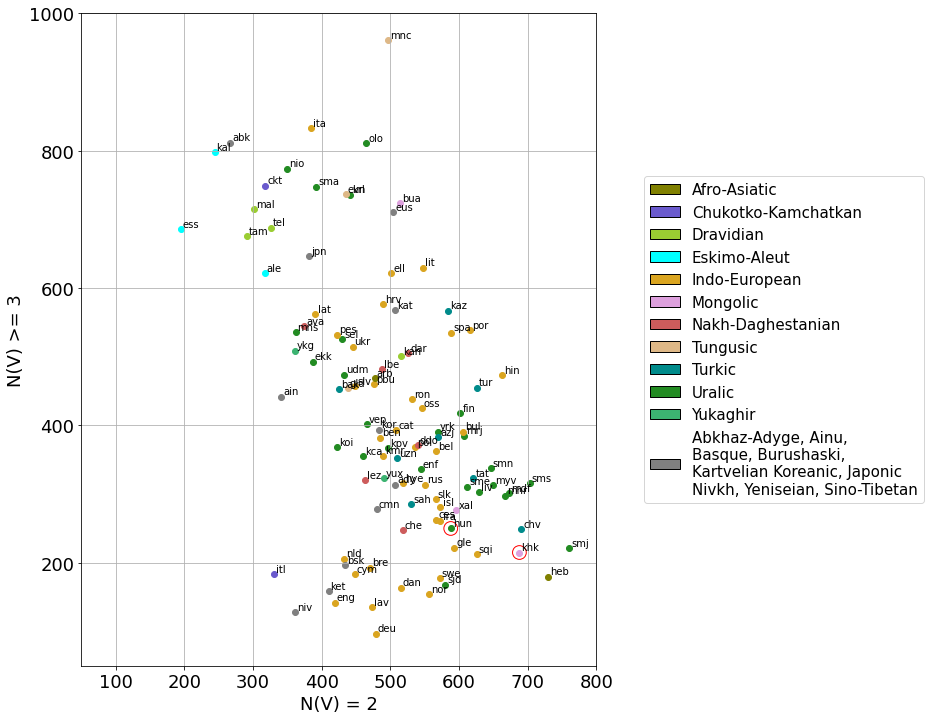

In [34]:
fig, ax = plt.subplots(figsize=(12,12))

for lang_id, counter in len_dicts.items():
    x = counter[2]
    y = sum([n for c, n in counter.items() if c > 2])
    print(lang_id, x, y)
    # print(x, y)
    fam = lang2family[lang_id]
    plt.scatter(x, y, color=color_mapping[fam])
    plt.text(x=x+3, y=y+3, s=lang_id)
    if lang_id in ['hun', 'khk']:
        circle = plt.Circle((x,y), 10, color='red', fill=False)
        ax.add_artist(circle)

plt.xlabel("N(V) = 2", fontsize=18)
plt.ylabel("N(V) >= 3", fontsize=18)
plt.xlim(50, 800)
plt.ylim(50, 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(True, which='both')
plt.gca().set_aspect('equal', adjustable='box')

plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.65, 0.5), fontsize=15)
plt.savefig("../img/num_vowels_nelex.png",
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)

plt.show()